### Required Try-It Activity 14.1: Generating Overfit Models

By default, you scikitlearn tree models will grow until every node is pure.  To explore this, you are to build different models using the `max_depth` parameter and determine when the tree begins to overfit the data.  For depths from `max_depth = 1` until the tree is completed, keep track of the accuracy on training vs. test data and generate a plot with depths as the horizontal axis and accuracy as the vertical axis for train and test data.  

Repeat this process with different splits of the data to determine at what depth the tree begins to overfit.  Share your results with your peers and discuss your approach to generating the visualization.  What are the consequences of this overfitting for your approach to building Decision Trees?   We provide a small dataset with health data where your goal is to predict whether or not the individuals survive.

In [324]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV
import time

In [325]:
data = pd.read_csv('data/Whickham.txt')

In [326]:
data.head()

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64


In [327]:
X = data[['smoker', 'age']]
y = data['outcome']

In [328]:
X =pd.get_dummies(X, drop_first=True)
print(X)

y = pd.get_dummies(y, drop_first=True)
print(y)

      age  smoker_Yes
0      23        True
1      18        True
2      71        True
3      67       False
4      64       False
...   ...         ...
1309   35        True
1310   33       False
1311   21        True
1312   46       False
1313   41        True

[1314 rows x 2 columns]
       Dead
0     False
1     False
2      True
3     False
4     False
...     ...
1309  False
1310  False
1311  False
1312  False
1313  False

[1314 rows x 1 columns]


In [329]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [336]:
max_depth_range = range(1, 20)

max_depth_list = []
train_acc_list = []
test_acc_list = []
time_taken = []
search_list = ["manual", "grid", "bayes", "random"]

start_time = time.time()
for max_depth in max_depth_range: 
    tree = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    tree.fit(X_train,y_train)
    y_preds = tree.predict(X_train)
    train_acc = accuracy_score(y_preds, y_train)
    y_preds = tree.predict(X_test)
    test_acc = accuracy_score(y_preds, y_test)
    max_depth_list.append(max_depth)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
end_time = time.time()
time_taken.append(end_time - start_time)

In [337]:
params = {
    "max_depth": range(1,21)
}

grid = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=params
)

start_time = time.time()
grid.fit(X_train,y_train)
end_time = time.time()
time_taken.append(end_time - start_time)

y_preds = grid.predict(X_train)
train_acc = accuracy_score(y_preds, y_train)
y_preds = grid.predict(X_test)
test_acc = accuracy_score(y_preds, y_test)

print(test_acc)
print(grid.best_params_)

0.8662613981762918
{'max_depth': 1}


In [338]:
params = {
    "max_depth": (1,21)
}

grid = BayesSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    search_spaces=params,
    random_state=42
)

start_time = time.time()
grid.fit(X_train,y_train)
end_time = time.time()
time_taken.append(end_time - start_time)

y_preds = grid.predict(X_train)
train_acc = accuracy_score(y_preds, y_train)
y_preds = grid.predict(X_test)
test_acc = accuracy_score(y_preds, y_test)

print(test_acc)
print(grid.best_params_)

/opt/miniconda3/envs/berkeley_ai/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(21)] before, using random point [np.int64(19)]
  warnings.warn(
/opt/miniconda3/envs/berkeley_ai/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(3)] before, using random point [np.int64(12)]
  warnings.warn(
/opt/miniconda3/envs/berkeley_ai/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(12)] before, using random point [np.int64(20)]
  warnings.warn(
/opt/miniconda3/envs/berkeley_ai/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(17)] before, using random point [np.int64(4)]
  warnings.warn(
/opt/miniconda3/envs/berkeley_ai/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWa

0.8662613981762918
OrderedDict([('max_depth', 1)])


In [339]:
params = {
    "max_depth": range(1,21)
}

grid = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_distributions=params,
    random_state=42
)

start_time = time.time()
grid.fit(X_train,y_train)
end_time = time.time()
time_taken.append(end_time - start_time)

y_preds = grid.predict(X_train)
train_acc = accuracy_score(y_preds, y_train)
y_preds = grid.predict(X_test)
test_acc = accuracy_score(y_preds, y_test)

print(test_acc)
print(grid.best_params_)

0.8662613981762918
{'max_depth': 1}


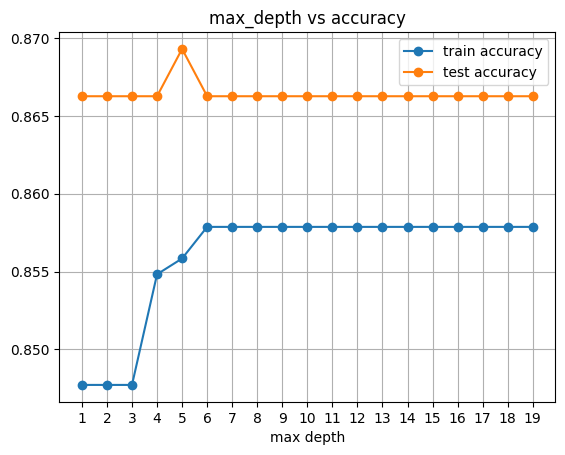

optimal max depth =  3
best train accuracy =  0.8477157360406091
best test accuracy =  0.8662613981762918


In [340]:
plt.xlabel("max depth")
plt.xticks(range(1,20))
plt.plot(max_depth_list, train_acc_list, label="train accuracy", marker='o')
plt.plot(max_depth_list, test_acc_list, label="test accuracy", marker='o')

plt.title("max_depth vs accuracy")
plt.legend()
plt.grid(True)
plt.show()

print("optimal max depth = ", max_depth_list[2])
print("best train accuracy = ", train_acc_list[2])
print("best test accuracy = ", test_acc_list[2])

In [350]:
time_taken = [round(x, 2) for x in time_taken]
print(time_taken)

[0.1, 0.31, 19.08, 0.15]


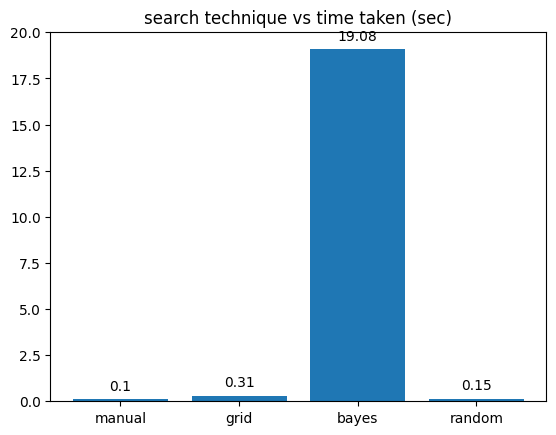

In [351]:
plt.title("search technique vs time taken (sec)")
plt.bar(search_list, time_taken)

for i, v in enumerate(time_taken):
    plt.text(i, v + 0.5, str(v), ha='center')  # Position above bars